<a href="https://colab.research.google.com/github/SStakafumi/Python_data_analysis_100knock/blob/main/src/chap_9/script_9_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import dlib
import math

predictor = dlib.shape_predictor("/content/drive/MyDrive/MyStudy/100knock-data_analytics/chap_9/shape_predictor_68_face_landmarks.dat")
detector = dlib.get_frontal_face_detector()

import cv2
img = cv2.imread('/content/drive/MyDrive/MyStudy/100knock-data_analytics/chap_9/img/img02.jpg')
dets = detector(img, 1)

顔方位:0.16930867445520711 (角度:9.700672481237781度)


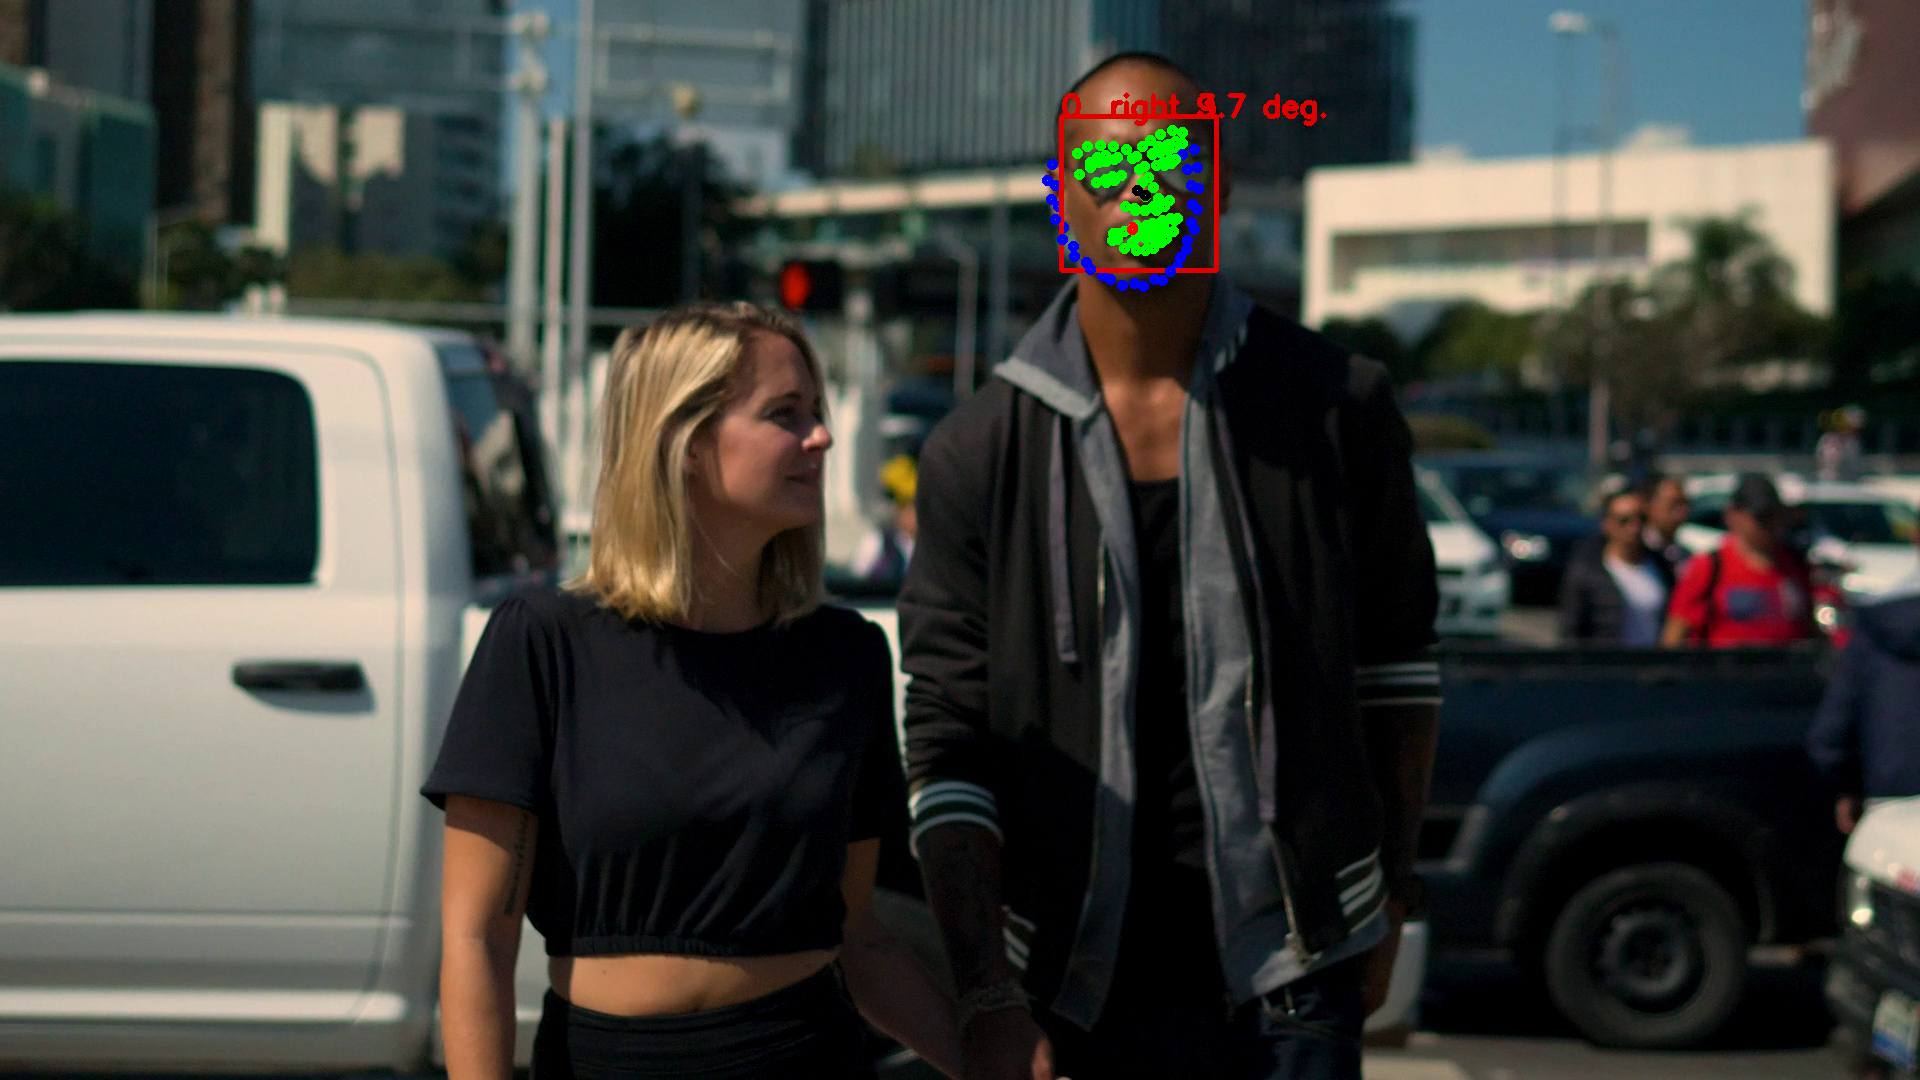

True

In [10]:
from google.colab.patches import cv2_imshow

for k, d in enumerate(dets):
    shape = predictor(img, d)

    # 顔領域の表示
    color_f = (0, 0, 225)
    color_l_out = (255, 0, 0)
    color_l_in = (0, 255, 0)
    line_w = 3
    circle_r = 3
    fontType = cv2.FONT_HERSHEY_SIMPLEX
    fontSize = 1
    cv2.rectangle(img, (d.left(), d.top()), (d.right(), d.bottom()), color_f, line_w)
    cv2.putText(img, str(k), (d.left(), d.top()), fontType, fontSize, color_f, line_w)

    # 重心を導出する箱を用意
    num_of_points_out = 17
    num_of_points_in = shape.num_parts - num_of_points_out
    gx_out = 0
    gy_out = 0
    gx_in = 0
    gy_in = 0
    for shape_point_count in range(shape.num_parts):
        shape_point = shape.part(shape_point_count)
        #print("顔器官No.{} 座標位置: ({},{})".format(shape_point_count, shape_point.x, shape_point.y))
        #器官ごとに描画
        if shape_point_count<num_of_points_out:
            cv2.circle(img,(shape_point.x, shape_point.y),circle_r,color_l_out, line_w)
            gx_out = gx_out + shape_point.x/num_of_points_out
            gy_out = gy_out + shape_point.y/num_of_points_out
        else:
            cv2.circle(img,(shape_point.x, shape_point.y),circle_r,color_l_in, line_w)
            gx_in = gx_in + shape_point.x/num_of_points_in
            gy_in = gy_in + shape_point.y/num_of_points_in

    # 重心位置を描画
    cv2.circle(img,(int(gx_out), int(gy_out)),circle_r,(0,0,255), line_w)
    cv2.circle(img,(int(gx_in), int(gy_in)),circle_r,(0,0,0), line_w)

    # 顔の方位を計算
    theta = math.asin(2*(gx_in-gx_out)/(d.right()-d.left()))
    radian = theta*180/math.pi
    print("顔方位:{} (角度:{}度)".format(theta,radian))

    # 顔方位を表示
    if radian<0:
        textPrefix = "   left "
    else:
        textPrefix = "   right "
    textShow = textPrefix + str(round(abs(radian),1)) + " deg."
    cv2.putText(img, textShow, (d.left(), d.top()), fontType, fontSize, color_f, line_w)

cv2_imshow(img)
cv2.imwrite("temp.jpg",img)